In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

 Data Preprocessing

In [14]:
df = pd.read_csv(r'C:\Users\LOQ\OneDrive\Desktop\Heart_Disease_Project\data\heart_disease.csv')

print(df.isnull().sum())
df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [15]:
#replace null values with the most frequent value in the column
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])


#make a binary classification for target col(check if 0 no heart disease , 1 have heart disease )
df['target']=df['target'].apply(lambda x: 1 if x > 0 else 0)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Outliers Detection by IQR method

In [16]:
#take a copy from original dataset
df_iqr=df.copy()

#continous cols
num_cols=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in num_cols:
    Q1=df_iqr[col].quantile(0.25)
    Q3=df_iqr[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower_limit) & (df_iqr[col] <= upper_limit)]

print("Original rows:", df.shape[0])
print("After removing outliers:", df_iqr.shape[0])

Original rows: 303
After removing outliers: 284


Standardize numerical features

In [17]:
#create instance from this class
scaler=StandardScaler()

#rescale numerical values to range between 0 and 1
df_iqr[num_cols]=scaler.fit_transform(df_iqr[num_cols])



#Save cleaned DataFrame to CSV
df_iqr.to_csv('../processed/heart_cleaned.csv', index=False)

df_iqr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.980969,1.0,1.0,0.973671,-0.213548,1.0,2.0,0.000000,0.0,1.319305,3.0,0.0,6.0,0
1,1.420393,1.0,4.0,1.946200,0.973426,0.0,2.0,-1.856679,1.0,0.538310,2.0,3.0,3.0,1
2,1.420393,1.0,4.0,-0.647211,-0.303131,0.0,2.0,-0.928339,1.0,1.612179,2.0,2.0,7.0,1
3,-1.875291,1.0,3.0,0.001141,0.167180,0.0,0.0,1.635646,0.0,2.490799,3.0,0.0,3.0,0
4,-1.435866,0.0,2.0,0.001141,-0.863025,0.0,2.0,0.972546,0.0,0.440685,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.996442,1.0,1.0,-1.295564,0.480720,0.0,0.0,-0.795720,0.0,0.245436,2.0,0.0,7.0,1
299,1.530249,1.0,4.0,0.908835,-1.109378,1.0,0.0,-0.397860,0.0,2.393175,2.0,2.0,7.0,1
300,0.321832,1.0,4.0,0.001141,-2.497914,0.0,0.0,-1.547232,1.0,0.245436,2.0,1.0,7.0,1
301,0.321832,0.0,2.0,0.001141,-0.146361,0.0,2.0,1.060959,0.0,-0.926058,2.0,1.0,3.0,1


Data Visualization

C:\Users\LOQ\AppData\Local\Temp\ipykernel_9212\811651922.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df_iqr, palette='Set2', ax=ax2)


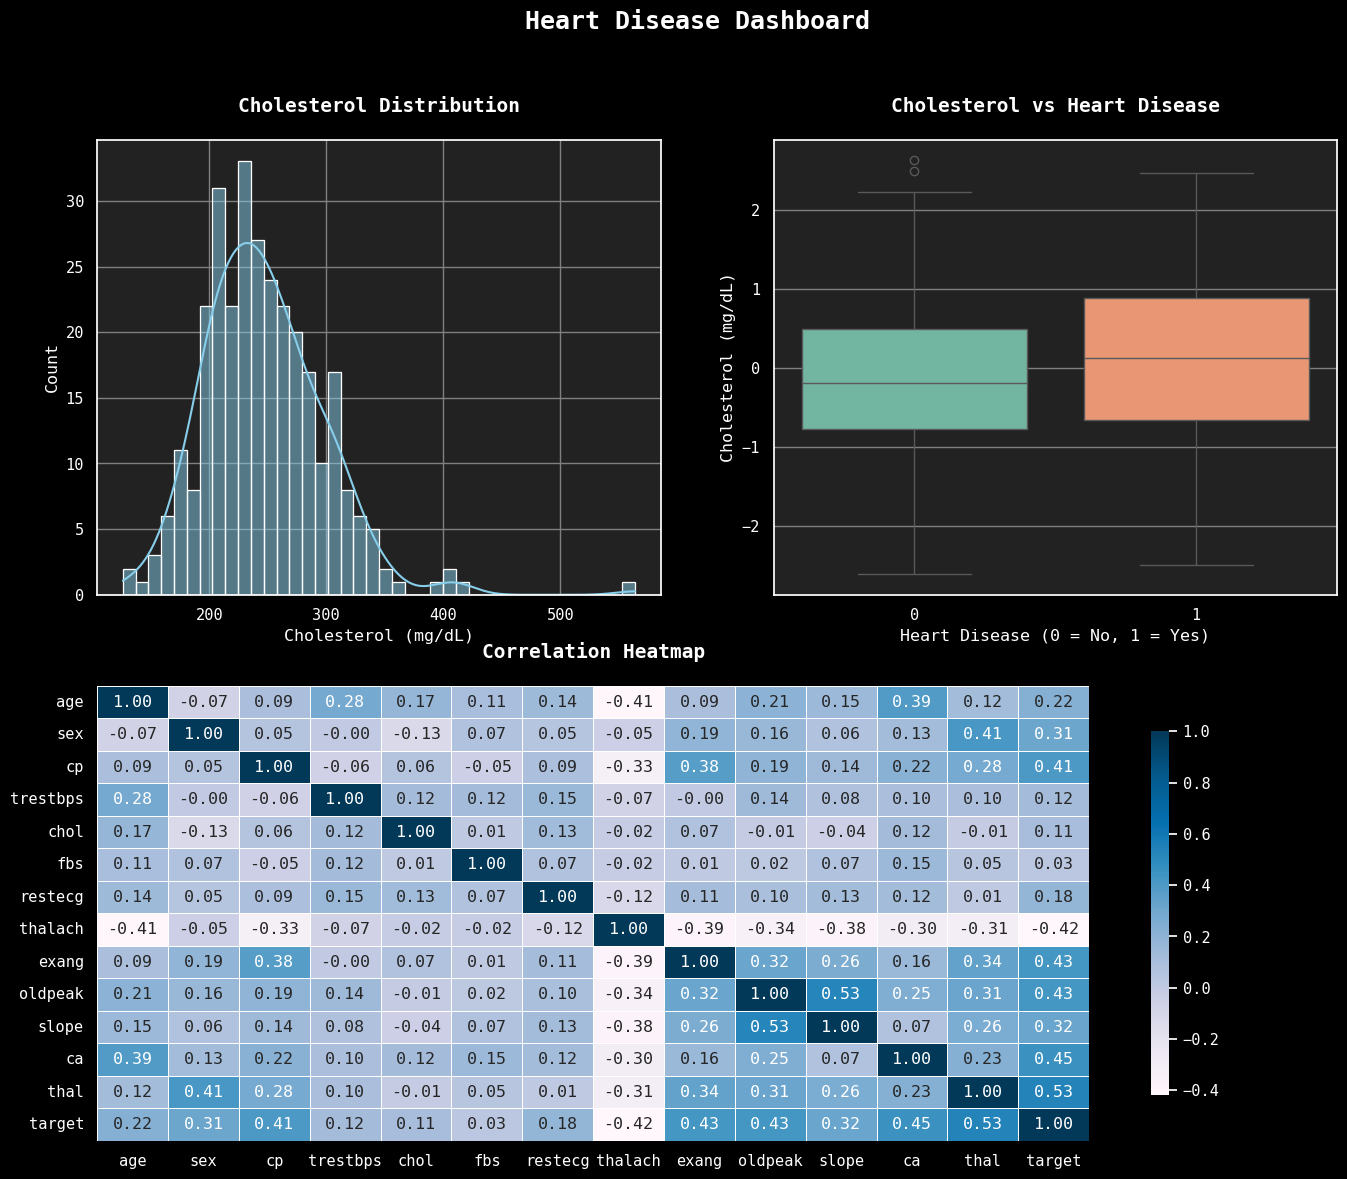

In [18]:
plt.style.use('dark_background') #customized themes
fig = plt.figure(figsize=(16, 13))
gs = fig.add_gridspec(2, 2)
#fig.subplots_adjust(wspace=0.4, hspace=0.6)

sns.set_theme(style='darkgrid', rc={
    'axes.facecolor': '#222222',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': 'gray',
    'axes.titleweight': 'bold',
    'font.family': 'monospace', 
    'axes.titlepad': 20,
    'axes.titlesize': 14
    
})

# Histogram
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df['chol'], bins=40, kde=True, color='skyblue', ax=ax1)
ax1.set_title("Cholesterol Distribution", fontsize=14, fontweight='bold',color='w')
ax1.set_xlabel("Cholesterol (mg/dL)")
ax1.set_ylabel("Count")

# Box Plot
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(x='target', y='chol', data=df_iqr, palette='Set2', ax=ax2)
ax2.set_title("Cholesterol vs Heart Disease", fontsize=14, fontweight='bold',color='w')
ax2.set_xlabel("Heart Disease (0 = No, 1 = Yes)")
ax2.set_ylabel("Cholesterol (mg/dL)")


# Heatmap
ax3 = fig.add_subplot(gs[1, :])
corr = df_iqr.corr()
#color bar for balanced look, fmt control the decimal no are diplayed inside the cell
sns.heatmap(corr, annot=True, fmt=".2f", cmap='PuBu', linewidths=0.5, ax=ax3, cbar_kws={"shrink": 0.8})
ax3.set_title("Correlation Heatmap", fontsize=14, fontweight='bold',color='w')


plt.suptitle("Heart Disease Dashboard", fontsize=18, fontweight='bold',color='w')
plt.show()